In [ ]:
import numpy as np
import scipy.signal as sig
import soundfile as sf
from matplotlib import pyplot as plt
import IPython.display as ipd

In [ ]:
def ffdelay(delay, g, b0, fs, input):
    '''
    function that implements a feed-forward comb filter
    delay: amount of delay specified in seconds
    g: gain coefficient for the input to the delay line
    b0: gain coefficient for direct sound
    fs: sample rate
    input: array holding a monophonic audio signal

    output: monophonic array holding a combination of the
        input scaled by b0, plus the delayed output scaled
        by g as it is input into the delay buffer.
        Note: in our implementation, output has the same
        dimensions as the input, so you may want to zero
        pad your input to see the full delayed output.
    '''

    output = np.zeros(np.shape(input)) # allocate output array

    # allocate array for delay line
    delay_samples = int(delay * fs) # sec * (samples/sec) --> samples

    delay_line = np.zeros(delay_samples)

    # create read/write pointers into the buffer
    read_pointer = 0
    write_pointer = delay_samples - 1

    for i in np.arange(0,np.size(output)):
        # read/write data into delay line and increment pointers
        # Read the delayed sample from the delay line
        delayed_unit = delay_line[read_pointer]

        # Calculate the output sample by combining direct and delayed signals
        output[i] = b0 * input[i] + g * delayed_unit

        # Write the current sample to the delay line
        delay_line[write_pointer] = input[i]

        # Increment the pointers with modulo to wrap around the buffer
        read_pointer = (read_pointer + 1) % delay_samples
        write_pointer = (write_pointer + 1) % delay_samples

    return output

Q2 (b) Zeros on Unit Circle

[1.  0.  0.  0.  0.  0.5]
[-0.87055056 -0.26901492 -0.26901492  0.7042902   0.7042902 ] [ 0.          0.82794279 -0.82794279  0.51169678 -0.51169678]
[ 1.   0.   0.   0.   0.  -0.8]
[-0.77370542 -0.77370542  0.29552918  0.29552918  0.9563525 ] [ 0.5621299  -0.5621299   0.90954528 -0.90954528  0.        ]


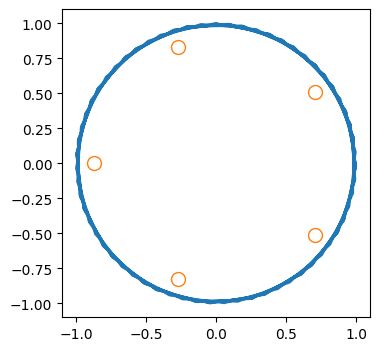

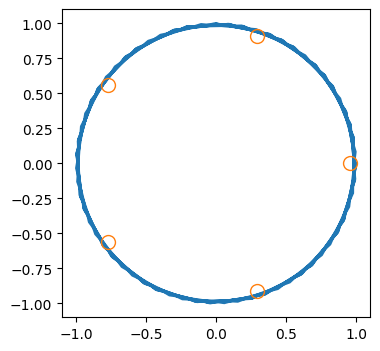

In [163]:
#g = 0.5
plt.figure(figsize=(8, 4))
M = 6
g = 0.5
b = np.zeros(M)
b[0] = 1
b[np.size(b)-1] = g

print(b)

z = np.roots(b)

print(np.real(z), np.imag(z))
# plot zeros
circM = 100
circx = np.sin(2*np.pi*np.linspace(0, 2*np.pi, circM))
circy = np.cos(2*np.pi*np.linspace(0, 2*np.pi, circM))
plt.plot(circx,circy)
plt.axis('square')
plt.plot(np.real(z), np.imag(z), 'o', fillstyle="none", ms=10)

#g = -0.8
plt.figure(figsize=(8, 4))
M = 6
g = -0.8
b = np.zeros(M)
b[0] = 1
b[np.size(b)-1] = g

print(b)

z = np.roots(b)

print(np.real(z), np.imag(z))
# plot zeros
circM = 100
circx = np.sin(2*np.pi*np.linspace(0, 2*np.pi, circM))
circy = np.cos(2*np.pi*np.linspace(0, 2*np.pi, circM))
plt.plot(circx,circy)
plt.axis('square')
plt.plot(np.real(z), np.imag(z), 'o', fillstyle="none", ms=10)

Q2 (c) ffdelay Function implemented with linear interpolation

In [ ]:
import numpy as np

def ffdelay_improved(delay, g, b0, fs, input_signal):

    # Calculate the integer and fractional part of the delay in samples
    delay_samples = delay * fs
    M = int(np.floor(delay_samples))  # Integer part of the delay
    frac = delay_samples - M  # Fractional part of the delay

    # Allocate output array
    output = np.zeros_like(input_signal)

    # Handle the delay with linear interpolation
    for n in range(len(input_signal)):
        # Calculate the indices for linear interpolation
        idx1 = n - M
        idx2 = n - M + 1

        interpolated_sample =  frac * input_signal[idx1]  + (1 - frac) * input_signal[idx2]

        # Combine direct and delayed signals
        output[n] = b0 * input_signal[n] + g * interpolated_sample
        # output[n] = input_signal[n - M + frac]
    print(output)

    return output


[1. 0. 0. ... 0. 0. 0.]


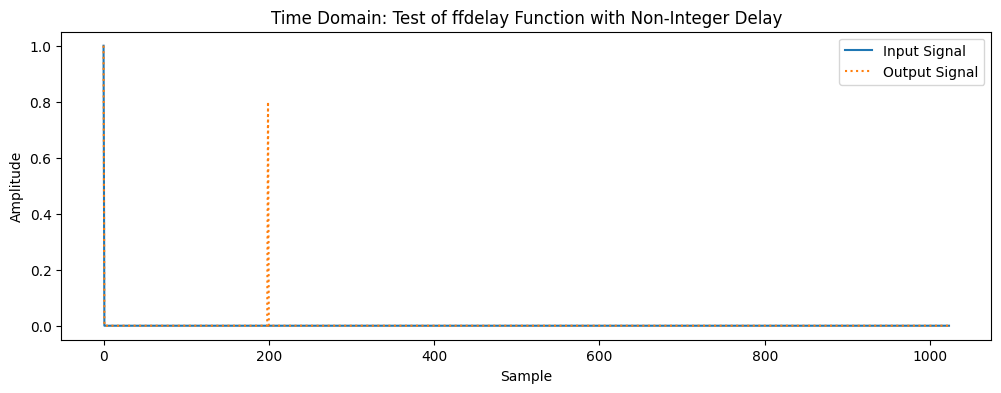

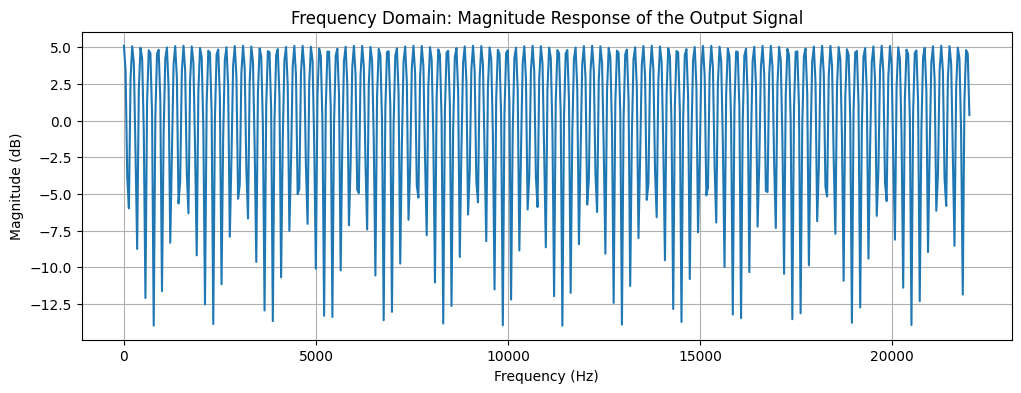

In [ ]:
#Test & Plot ffdelay_improved in both time and freq domain
fs = 44100
g = 0.8
b0 = 1
M = 200
delay = M/fs  # in seconds

# Create a test impulse response
input_signal_test = np.zeros(1024)
input_signal_test[0] = 1

# Apply the improved ffdelay function
output_signal_test = ffdelay_improved(delay, g, b0, fs, input_signal_test)

# Plot the input and output signals for comparison
plt.figure(figsize=(12, 4))
plt.plot(input_signal_test, label='Input Signal')
plt.plot(output_signal_test, label='Output Signal', linestyle='dotted')
plt.title('Time Domain: Test of ffdelay Function with Non-Integer Delay')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Compute the FFT of the output signal
fft_output = np.fft.fft(output_signal_test)

# Compute the magnitude in dB
magnitude_response = 20 * np.log10(np.abs(fft_output))

# Generate frequency axis data for plotting
frequencies = np.linspace(0, fs, len(fft_output), endpoint=False)

# Plot the magnitude response
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude_response[:len(frequencies)//2])
plt.title('Frequency Domain: Magnitude Response of the Output Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()


In [ ]:
def fbdelay(delay, g, b0, fs, input):
    '''
    function that implements a feedback comb filter
    delay: amount of delay specified in seconds
    g: gain coefficient for the input to the delay line
    b0: gain coefficient for direct sound
    fs: sample rate
    input: array holding a monophonic audio signal

    output: monophonic array holding a combination of the
        input scaled by b0, plus the delayed output scaled
        by g as it is input into the delay buffer.
        Note: in our implementation, output has the same
        dimensions as the input, so you may want to zero
        pad your input to see the full delayed output.
    '''

    output = np.zeros(np.shape(input)) # allocate output array

    #  allocate array for delay line
    M = int(fs * delay)
    delay_line = np.zeros(M)
    # create read/write pointers into the buffer
    read_pointer = 0
    write_pointer = 0



    for n in range(len(input)):
        delayed_sample = delay_line[read_pointer]

        # Calculate the current output sample
        output[n] = b0 * input[n] + g * delayed_sample

        # read/write data into delay line and increment pointers

        # Write the current output (not input) sample to the delay line for feedback
        delay_line[write_pointer] = output[n]

        read_pointer = (read_pointer + 1) % M
        write_pointer = (write_pointer + 1) % M
    return output

0.0045351473922902496


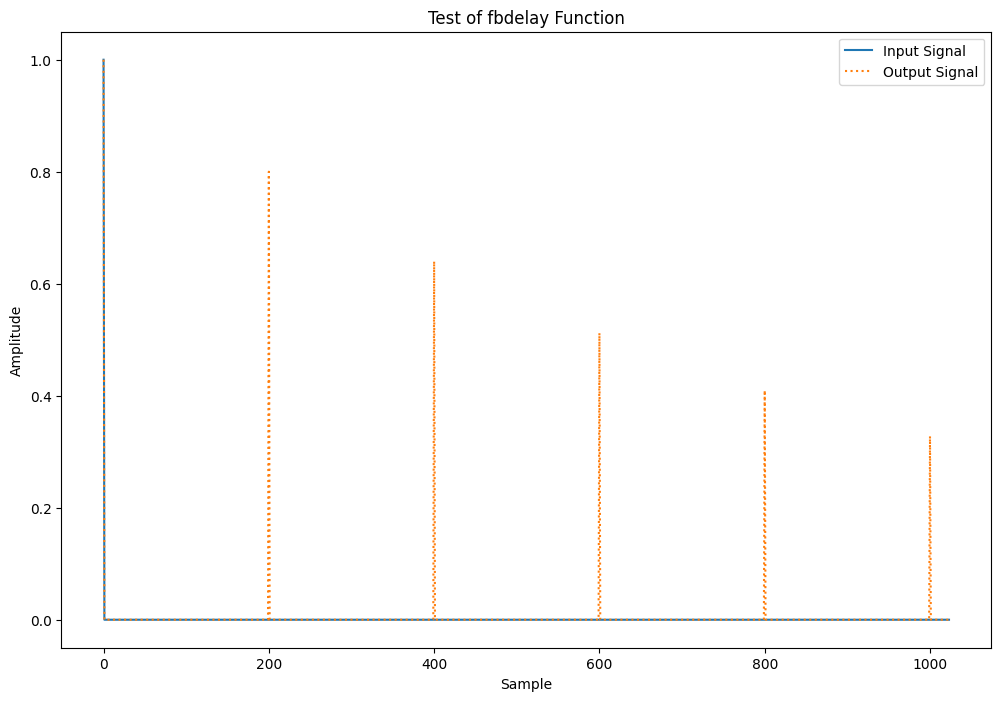

In [166]:
# Test & Plot in time domain
fs = 44100
g = 0.8
b0 = 1.0
M = 200
delay = M / fs # in seconds
print(M/fs)

# Create unit impulse for test
input_signal_test = np.zeros(1024)
input_signal_test[0] = 1

# Apply the improved ffdelay function with non-integer delay
# output_signal_test = ffdelay(delay, g, b0, fs, input_signal_test)
# output_signal_test = ffdelay_improved(delay, g, b0, fs, input_signal_test)
output_signal_test = fbdelay(delay, g, b0, fs, input_signal_test)

# Plot the input and output signals for comparison
plt.figure(figsize=(12, 8))
plt.plot(input_signal_test, label='Input Signal')
plt.plot(output_signal_test, label='Output Signal', linestyle='dotted')
plt.title('Test of fbdelay Function')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Q 2 (d) Plot the magnitude response of your FIR and IIR
comb filters for fs = 44100, M = 200, and g = −0.9.

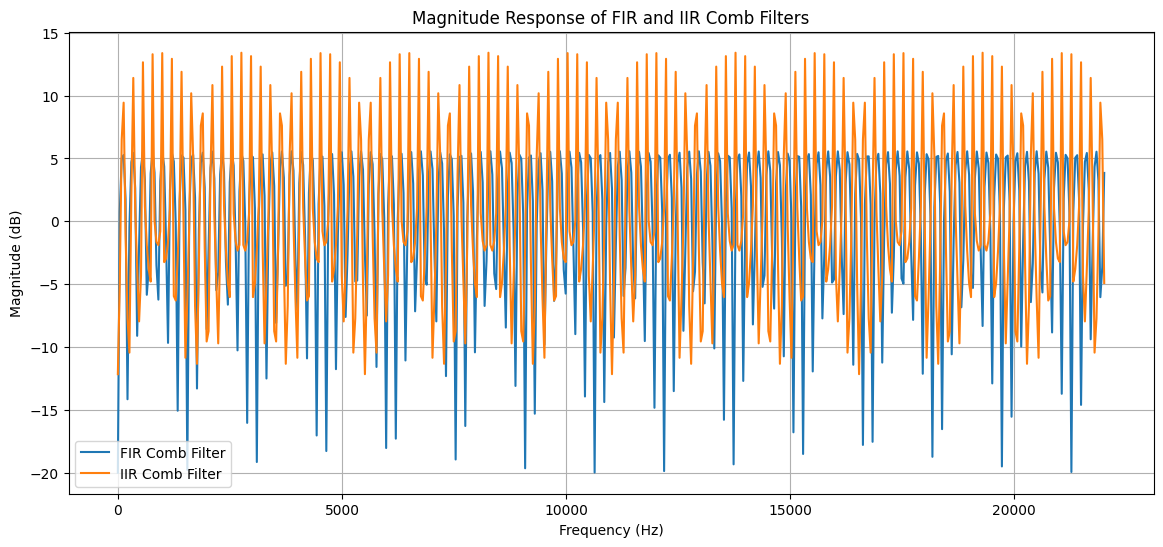

In [ ]:
from scipy.fft import fft

fs = 44100
M = 200
g = -0.9
b0 = 1.0
delay = M / fs #delay in sec

# Create impulse signal
input = np.zeros(1024)
input[0] = 1.0

output_ff = ffdelay(delay, g, b0, fs, input)
output_fb = fbdelay(delay, g, b0, fs, input)

magnitude_response_ff = np.abs(fft(output_ff))
magnitude_response_fb = np.abs(fft(output_fb))
frequencies = np.linspace(0, fs, len(magnitude_response_ff), endpoint=False)

# plotting the magnitude responses
plt.figure(figsize=(14, 6))
plt.plot(frequencies[:len(frequencies)//2], 20*np.log10(magnitude_response_ff[:len(frequencies)//2]), label='FIR Comb Filter')
plt.plot(frequencies[:len(frequencies)//2], 20*np.log10(magnitude_response_fb[:len(frequencies)//2]), label='IIR Comb Filter')
plt.title('Magnitude Response of FIR and IIR Comb Filters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()

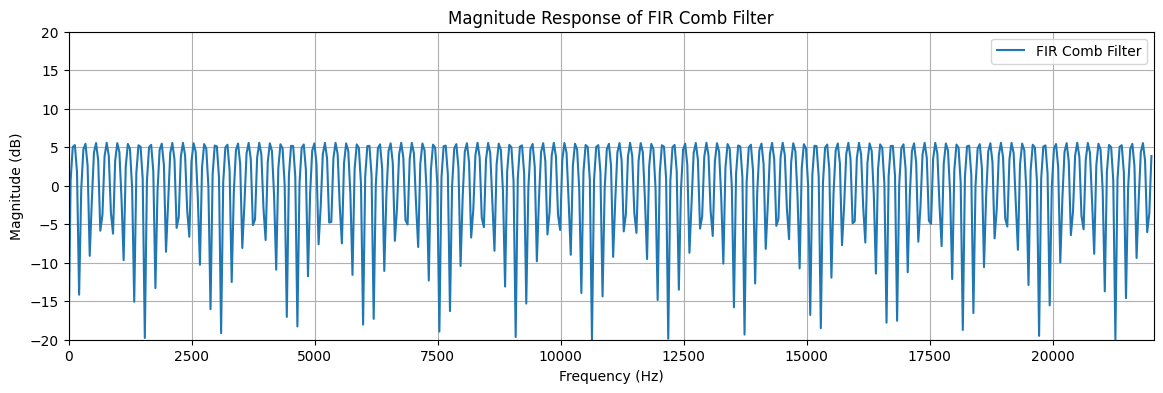

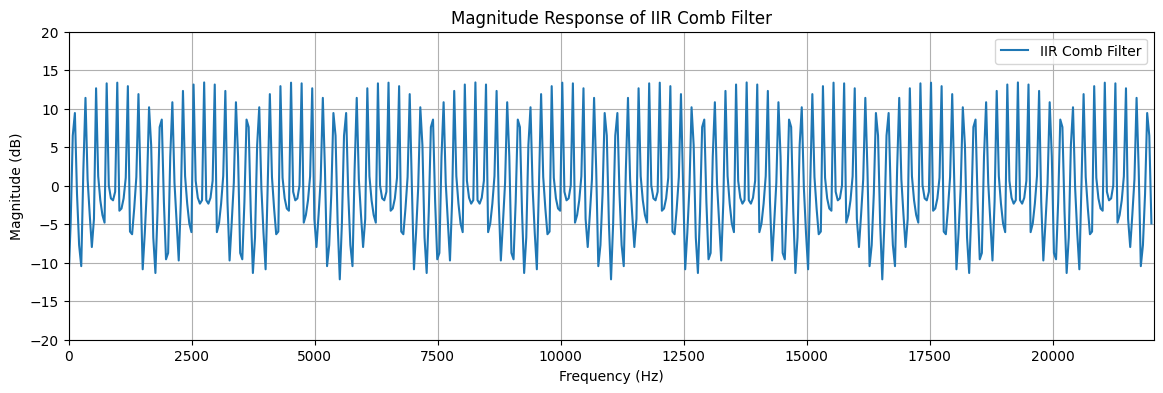

In [ ]:
# Plotting the magnitude response of the FIR comb filter
plt.figure(figsize=(14, 4))
plt.plot(frequencies[:len(frequencies)//2], 20*np.log10(magnitude_response_ff[:len(frequencies)//2]), label='FIR Comb Filter')
plt.xlim(0, fs/2)
plt.ylim(-20, 20)
plt.title('Magnitude Response of FIR Comb Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the magnitude response of the IIR comb filter
plt.figure(figsize=(14, 4))
plt.plot(frequencies[:len(frequencies)//2], 20*np.log10(magnitude_response_fb[:len(frequencies)//2]), label='IIR Comb Filter')
plt.xlim(0, fs/2)
plt.ylim(-20, 20)
plt.title('Magnitude Response of IIR Comb Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()

Q2 (e) Play with white noise. Create C major scale.

In [ ]:
from scipy.io.wavfile import write
import librosa
from IPython.display import Audio, display

# Generate 1 second of white noise
fs = 44100
duration = 1  # seconds
white_noise = 0.1 * np.random.randn(fs * duration)

# Note frequencies for A major scale starting from A4
note_frequencies = [440.00, 493.88, 554.37, 587.33, 659.25, 739.99, 830.61, 880.00]

# Placeholder for processed audio
processed_audio_1 = np.array([])
processed_audio_2 = np.array([])


for freq in note_frequencies:
    # Calculate delay for the note
    delay = 1 / freq

    # Process the white noise through comb filter
    output_signal_1 = ffdelay_improved(delay, 0.4, 1.0, fs, white_noise)
    output_signal_2 = fbdelay(delay, 0.4, 1.0, fs, white_noise)

    # Correctly concatenate the output to the processed audio
    processed_audio_1 = np.concatenate((processed_audio_1, output_signal_1))
    processed_audio_2 = np.concatenate((processed_audio_2, output_signal_2))


print("Processed audio ffdelay:")
display(Audio(processed_audio_1, rate=fs))

print("Processed audio fbdelay:")
display(Audio(processed_audio_2, rate=fs))

# Save the processed audio
write('processed_audio_ffdelay.wav', fs, processed_audio_1)
write('processed_audio_fbdelay.wav', fs, processed_audio_2)
print("Processed audio has been saved.")


[ 0.19347538 -0.22972737  0.00362723 ... -0.07562197  0.0200798
 -0.18166777]
[ 0.11220302 -0.26407615 -0.02147818 ... -0.09113334  0.02346818
 -0.20138254]
[ 0.119394   -0.27740179 -0.01244261 ... -0.10294498  0.06105633
 -0.15011559]
[ 0.18839845 -0.27661121 -0.015824   ... -0.07814149  0.11534307
 -0.20866017]
[ 0.09954029 -0.27702497  0.01009573 ... -0.02842109  0.11277818
 -0.2523258 ]
[ 0.13190318 -0.24633445 -0.01222529 ... -0.07057286  0.06303293
 -0.17128365]
[ 0.08026888 -0.23797574 -0.06603082 ... -0.03960143 -0.037918
 -0.18475691]
[ 0.15869127 -0.25575625 -0.05722107 ... -0.12255699  0.10142709
 -0.20030136]
Processed audio ffdelay:


Processed audio fbdelay:


Processed audio has been saved.


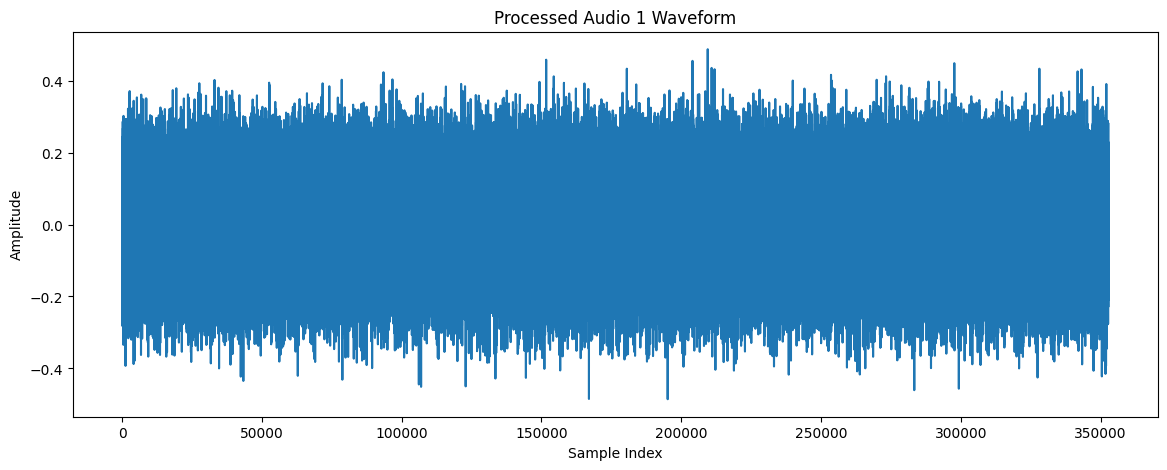

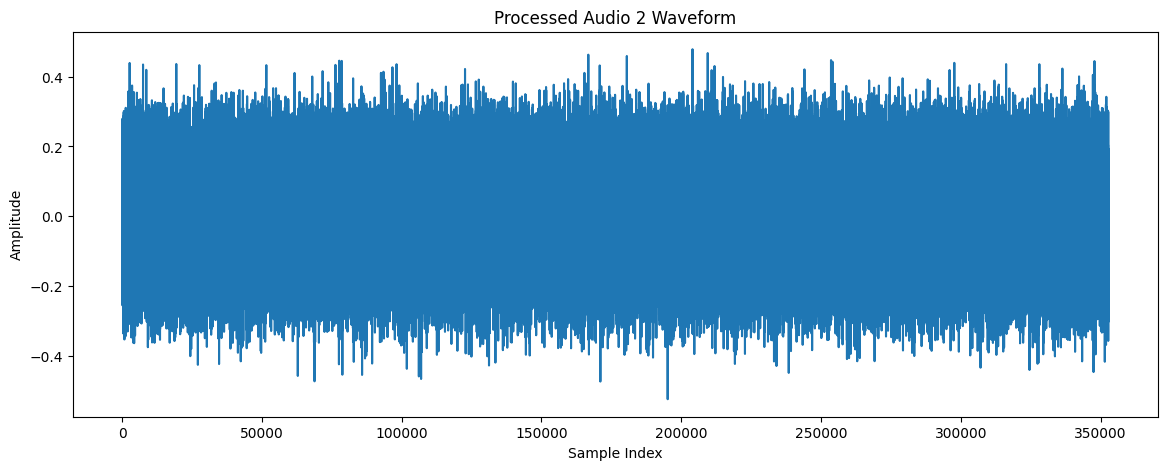

In [ ]:
# Plotting processed_audio_1
plt.figure(figsize=(14, 5))
plt.plot(processed_audio_1)
plt.title('Processed Audio 1 Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

# Plotting processed_audio_2
plt.figure(figsize=(14, 5))
plt.plot(processed_audio_2)
plt.title('Processed Audio 2 Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

**Answer question for Q2 (e):**

Both scales played through my FIR and IIR comb filter sounds like scales played using a vacunme cleaner. By listening, seems like IIR filter generate a clearer and more aubible scale. Therefore, I think IIR feedback filter is better at generate music in this case.

To improve the sound, I think applying a low pass filter on top of this scale may help to attenuate the high frequencies since the comb filter sounds metallic
because it has lots of high frequency content.

In [ ]:
# try with to process with a low-pass filter
from scipy.signal import butter, lfilter
def apply_lowpass(signal, cutoff_freq, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normalized_cutoff = cutoff_freq / nyq  # Normalized cutoff frequency

    b, a = butter(order, normalized_cutoff, btype='low', analog=False)

    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

fs = 44100  # Sampling rate in Hz
cutoff_freq = 3000

# Assuming processed_audio_2 is your signal
lowpass_audio_2 = apply_lowpass(processed_audio_2, cutoff_freq, fs)

print("Processed audio fbdelay with lowpass:")
display(Audio(lowpass_audio_2, rate=fs))

write('lowpass_audio_2.wav', fs, lowpass_audio_2)
print("Processed audio has been saved.")

Processed audio fbdelay with lowpass:


Processed audio has been saved.


Q2 (f) Apply comb filter with other signals:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
audio_file_path = '/content/drive/MyDrive/DST_SP04/hw2/gtr.wav'

audio, sr = librosa.load(audio_file_path)

print("Original:")
Audio(audio, rate=sr)

Original: 


In [ ]:
fs = sr  # Use the sample rate of the loaded audio file
g = 0.8
b0 = 1.0
delay_seconds = 0.005  #  in seconds

processed_audio_guitar = fbdelay(delay_seconds, g, b0, fs, audio)

# Listen to the processed audio
print("Processed Audio guitar:")
display(Audio(processed_audio_guitar, rate=sr))

write('processed_audio_guitar.wav', fs, processed_audio_guitar)
print("Processed audio has been saved.")

Processed Audio guitar:


Processed audio has been saved.


Optional question: didn't have time to do

In [ ]:
def modDelay(lfo_freq, lfo_depth, dry, wet, fs, input):
    '''
    function that implements a modulated delay effect
    lfo_freq: the frequency of the low frequency oscillator
    lfo_depth: the amplitude of the low frequency oscillator
    dry: amplitude of the dry, unprocessed signal
    wet: amplitude of the wet, processed signal
    fs: sample rate
    input: array holding a monophonic audio signal

    output: monophonic array holding a LFO modulated version of the input
    '''

    output = np.zeros(np.shape(input)) # allocate output array

    # allocate array for delay line


    # create read/write pointers into the buffer

    # variable to hold the phase of the LFO
    lfo_phi = 0


    for i in np.arange(0,np.size(output)):
        # implement LFO
        # update output of LFO to update position of read pointer
        # read/write data into delay line and increment pointers

        output[i] = input[i]

    return output

